In [0]:
# Change directory to VSCode workspace root so that relative path loads work correctly. Turn this addition off with the DataScience.changeDirOnImportExport setting
import os
try:
	os.chdir(os.path.join(os.getcwd(), '..'))
	print(os.getcwd())
except:
	pass


In [34]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt

# hyper parameters
input_size = 13
output_size = 1
num_epochs =  5000
learning_rate = 0.01


In [35]:
boston = load_boston()
X = boston.data
y = boston.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 5)


In [36]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

y_train = np.expand_dims(y_train, axis=1)
y_test = np.expand_dims(y_test, axis=1)


In [37]:
class LinerRegression(nn.Module):

    def __init__(self, input_size, output_size):
        super(LinerRegression, self).__init__()
        self.linear = nn.Linear(input_size, output_size)
    
    def forward(self, x):
        out = self.linear(x)
        return out

model = LinerRegression(input_size, output_size)


epoch 0, loss: 604.6802 val_loss: 603.1160
epoch 200, loss: 461.1181 val_loss: 460.6408
epoch 400, loss: 377.7857 val_loss: 377.4193
epoch 600, loss: 311.3417 val_loss: 311.0392
epoch 800, loss: 255.5926 val_loss: 255.3362
epoch 1000, loss: 208.2829 val_loss: 208.0656
epoch 1200, loss: 168.3671 val_loss: 168.1847
epoch 1400, loss: 135.0503 val_loss: 134.8991
epoch 1600, loss: 107.6020 val_loss: 107.4783
epoch 1800, loss: 85.3296 val_loss: 85.2301
epoch 2000, loss: 67.5744 val_loss: 67.4959
epoch 2200, loss: 53.7086 val_loss: 53.6480
epoch 2400, loss: 43.1366 val_loss: 43.0911
epoch 2600, loss: 35.2974 val_loss: 35.2642
epoch 2800, loss: 29.6692 val_loss: 29.6458
epoch 3000, loss: 25.7767 val_loss: 25.7609
epoch 3200, loss: 23.1979 val_loss: 23.1877
epoch 3400, loss: 21.5716 val_loss: 21.5654
epoch 3600, loss: 20.6022 val_loss: 20.5986
epoch 3800, loss: 20.0599 val_loss: 20.0579
epoch 4000, loss: 19.7776 val_loss: 19.7766
epoch 4200, loss: 19.6420 val_loss: 19.6415
epoch 4400, loss: 19.

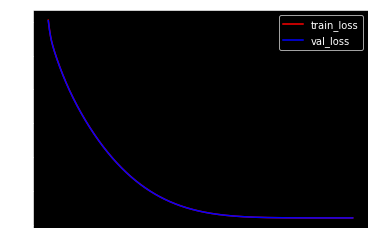

In [38]:
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

def train(X_train, y_train):
    inputs = torch.from_numpy(X_train).float()
    targets = torch.from_numpy(y_train).float()

    optimizer.zero_grad()
    outputs = model(inputs)

    loss = criterion(outputs, targets)
    loss.backward()
    optimizer.step()

    return loss.item()

def valid(X_test, y_test):
    inputs = torch.from_numpy(X_train).float()
    targets = torch.from_numpy(y_train).float()

    outputs = model(inputs)
    val_loss = criterion(outputs, targets)

    return val_loss.item()

# train the model
loss_list = []
val_loss_list = []
for epoch in range(num_epochs):
    # data shuffle
    perm = np.arange(X_train.shape[0])
    np.random.shuffle(perm)
    X_train = X_train[perm]
    y_train = y_train[perm]

    loss = train(X_train, y_train)
    val_loss = valid(X_test, y_test)

    if epoch % 200 == 0:
        print('epoch %d, loss: %.4f val_loss: %.4f' % (epoch, loss, val_loss))

    loss_list.append(loss)
    val_loss_list.append(val_loss)

# plot learning curve
plt.plot(range(num_epochs), loss_list, 'r-', label='train_loss')
plt.plot(range(num_epochs), val_loss_list, 'b-', label='val_loss')
plt.legend()